In [187]:
pip install pillow opencv-python pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
from PIL import Image 
from pytesseract import image_to_string 
import cv2
import numpy as np
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from google.colab.patches import cv2_imshow

In [190]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# Opens a image in RGB mode 
image1 = Image.open("/content/drive/My Drive/IA3/try1.jpg")
image2 = Image.open("/content/drive/My Drive/IA3/try2.jpg")
image3 = Image.open("/content/drive/My Drive/IA3/try3.jpg")
image4 = Image.open("/content/drive/My Drive/IA3/try4.jpg")

In [192]:
# Crop the Images
image1_cropped = image1.crop(box=(675,630,1020,735))
image2_cropped = image2.crop(box=(392,350,587,390))
image3_cropped = image3.crop(box=(334,316,562,365))
image4_cropped = image4.crop(box=(510,220,1135,434))

In [193]:
# Save the images
image1_cropped.save("/content/drive/My Drive/IA3/Cropped/try1.jpg")
image2_cropped.save("/content/drive/My Drive/IA3/Cropped/try2.jpg")
image3_cropped.save("/content/drive/My Drive/IA3/Cropped/try3.jpg")
image4_cropped.save("/content/drive/My Drive/IA3/Cropped/try4.jpg")

In [194]:
# Reading Img using Open CV
img1 = cv2.imread('/content/drive/My Drive/IA3/Cropped/try1.jpg')
img2 = cv2.imread('/content/drive/My Drive/IA3/Cropped/try2.jpg')
img3 = cv2.imread('/content/drive/My Drive/IA3/Cropped/try3.jpg')
img4 = cv2.imread('/content/drive/My Drive/IA3/Cropped/try4.jpg')

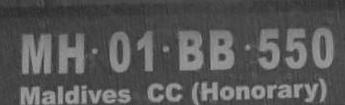

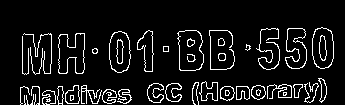

In [195]:
# Convert image into GrayScale
gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Show image
cv2_imshow(gray_image1)

# Apply Canny edge detection
edges1 = cv2.Canny(gray_image1, 100, 200)
# Show image
cv2_imshow(edges1)

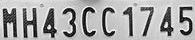

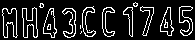

In [196]:
# Convert image into GrayScale
gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Show image
cv2_imshow(gray_image2)

# Apply Canny edge detection
edges2 = cv2.Canny(gray_image2, 130, 260)
# Show image
cv2_imshow(edges2)

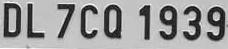

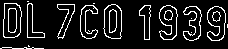

In [197]:
# Convert image into GrayScale
gray_image3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
# Show image
cv2_imshow(gray_image3)

# Apply Canny edge detection
edges3 = cv2.Canny(gray_image3, 120, 230)
# Show image
cv2_imshow(edges3)

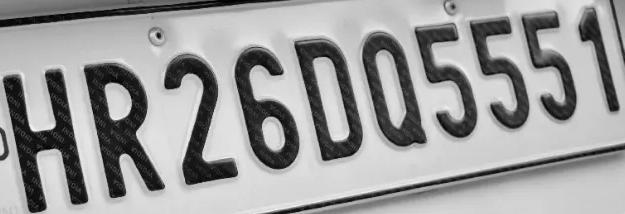

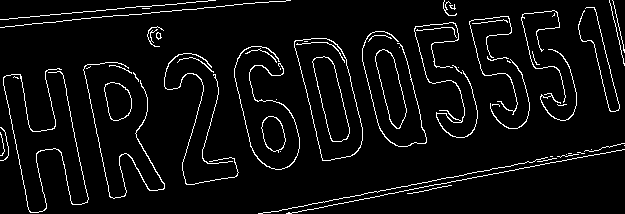

In [199]:
# Convert image into GrayScale
gray_image4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
# Show image
cv2_imshow(gray_image4)

# Apply Canny edge detection
edges4 = cv2.Canny(gray_image4, 170, 300)
# Show image
cv2_imshow(edges4)

#####TRY1

In [200]:
# Create an MSER object
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img1, (img1.shape[1]*2, img1.shape[0]*2))
img = img[5:-5,5:-5,:]

gray = gray_image1
vis = img.copy()

regions = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0,255,0)) 


array([[[78, 69, 65],
        [77, 68, 64],
        [76, 67, 63],
        ...,
        [68, 59, 55],
        [69, 60, 56],
        [69, 60, 56]],

       [[78, 69, 65],
        [78, 69, 65],
        [77, 68, 64],
        ...,
        [68, 59, 55],
        [70, 61, 57],
        [70, 61, 57]],

       [[77, 68, 64],
        [78, 69, 65],
        [78, 69, 65],
        ...,
        [68, 59, 55],
        [69, 61, 56],
        [69, 61, 56]],

       ...,

       [[77, 69, 62],
        [77, 69, 62],
        [77, 69, 62],
        ...,
        [84, 75, 71],
        [84, 75, 71],
        [85, 76, 72]],

       [[77, 69, 62],
        [77, 69, 62],
        [77, 69, 62],
        ...,
        [83, 74, 70],
        [84, 75, 71],
        [84, 75, 71]],

       [[77, 69, 62],
        [77, 69, 62],
        [77, 69, 62],
        ...,
        [83, 74, 70],
        [83, 74, 70],
        [84, 75, 71]]], dtype=uint8)

In [201]:
# Perform OCR using PyTesseract
def ocr_core(img1):
    text = pytesseract.image_to_string(Image.open(img1))
    return text

# Print the extracted text
print(ocr_core("/content/drive/My Drive/IA3/Cropped/try1.jpg"))

MH-01-BB-550

Maldives CC (Honorary)



#####TRY3


In [202]:
# Create an MSER object
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img3, (img3.shape[1]*2, img3.shape[0]*2))
img = img[5:-5,5:-5,:]

gray = gray_image3
vis = img.copy()

regions = mser.detectRegions(gray)

hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0,255,0)) 


array([[[203, 205, 205],
        [206, 208, 208],
        [205, 207, 207],
        ...,
        [188, 189, 189],
        [189, 189, 189],
        [190, 190, 190]],

       [[192, 194, 194],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [187, 187, 187],
        [189, 189, 189],
        [190, 190, 190]],

       [[185, 187, 187],
        [  0, 255,   0],
        [158, 159, 159],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [189, 189, 189]],

       ...,

       [[195, 195, 195],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [193, 198, 197],
        [194, 199, 198],
        [194, 199, 198]],

       [[195, 195, 195],
        [194, 194, 194],
        [194, 194, 194],
        ...,
        [193, 198, 197],
        [194, 199, 198],
        [194, 199, 198]],

       [[196, 196, 196],
        [195, 195, 195],
        [195, 195, 195],
        ...,
        [194, 199, 198],
        [194, 200, 199],
        [194, 200, 199]]

In [203]:
# Perform OCR using PyTesseract
def ocr_core(img3):
    text = pytesseract.image_to_string(Image.open(img3))
    return text

# Print the extracted text
print(ocr_core("/content/drive/My Drive/IA3/Cropped/try3.jpg"))

DL 7CQ 1939

